In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

C:\Users\Lucas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
v_1 = 2776.38
v_2 = 2875.27

u_1 = 7.6133
u_2 = 7.8342

In [11]:
T_1 = 150
T_2 = 200
T_3 = 170

In [12]:
u_3 = (u_2 - u_1)*(T_3 - T_1)/(T_2 - T_3) + u_1
v_3 = (v_2 - v_1)*(T_3 - T_1)/(T_2 - T_3) + v_1

In [8]:
print(u_3, 'u')

2632.9500000000003 u


In [9]:
print(v_3,'v')

2.0936266666666667 v


In [13]:
print(u_3, 'sbb')

7.760566666666667 s


In [27]:
(4.3405 - 0.69833)*(4.3405/0.69833)*443

10028.662131162915

In [20]:
(0.520 - 0.312)*(0.520/0.312)*300

104.00000000000001

In [14]:
print(v_3, 'h')

2842.306666666667 h


In [64]:
df = pd.read_csv('_termoflu.csv', sep =';')

In [66]:
df

,T (K),cp_h2,cv_h2,cp_ar,cv_ar,cp_co2,cv_co2
0,250,14.051,9.927,1.003,0.716,0.791,0.602
1,300,14.307,10.183,1.005,0.718,0.846,0.657
2,350,14.427,10.302,1.008,0.721,0.895,0.706
3,400,14.476,10.352,1.013,0.726,0.939,0.750
4,450,14.501,10.377,1.020,0.733,0.978,0.790
5,500,14.513,10.389,1.029,0.742,1.014,0.825
6,550,14.530,10.405,1.040,0.753,1.046,0.857
7,600,14.546,10.422,1.051,0.764,1.075,0.886
8,650,14.571,10.447,1.063,0.776,1.102,0.913
9,700,14.604,10.480,1.075,0.788,1.126,0.937


In [48]:
df['cv_ar'] = df['cv_ar']/1000

In [67]:
df['r_h2'] = df['cp_h2'] - df['cv_h2']
df['r_ar'] = df['cp_ar'] - df['cv_ar']
df['r_co2'] = df['cp_co2'] - df['cv_co2']

In [101]:
df[['a_h2', 'a_ar', 'a_co2']].to_csv('fe.csv', index = False)

In [52]:
import numpy as np

In [61]:
np.sqrt((14.051/9.927) * 4.124 * 250)

38.200930234968936

In [72]:
plotable = df[['a_h2', 'a_ar', 'a_co2']]

In [69]:
df['a_h2'] = df.apply(lambda row: np.sqrt((row['cp_h2']/row['cv_h2']) * (row['r_h2']) * row['T (K)']), axis = 1)
df['a_ar'] = df.apply(lambda row: np.sqrt((row['cp_ar']/row['cv_ar']) * (row['r_ar']) * row['T (K)']), axis = 1)
df['a_co2'] = df.apply(lambda row: np.sqrt((row['cp_co2']/row['cv_co2']) * (row['r_co2']) * row['T (K)']), axis = 1)

In [80]:
from sklearn.linear_model import LinearRegression

In [83]:
h2_regressor = LinearRegression()  # create object for the class
h2_regressor.fit(df['T (K)'].values.reshape(-1, 1), df['a_h2'].values.reshape(-1, 1))  # perform linear regression
h2_pred = h2_regressor.predict(df['T (K)'].values.reshape(-1, 1))  # make predictions

In [86]:
ar_regressor = LinearRegression()  # create object for the class
ar_regressor.fit(df['T (K)'].values.reshape(-1, 1), df['a_ar'].values.reshape(-1, 1))  # perform linear regression
ar_pred = ar_regressor.predict(df['T (K)'].values.reshape(-1, 1))  # make predictions

In [87]:
co2_regressor = LinearRegression()  # create object for the class
co2_regressor.fit(df['T (K)'].values.reshape(-1, 1), df['a_co2'].values.reshape(-1, 1))  # perform linear regression
co2_pred = co2_regressor.predict(df['T (K)'].values.reshape(-1, 1))  # make predictions

In [90]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

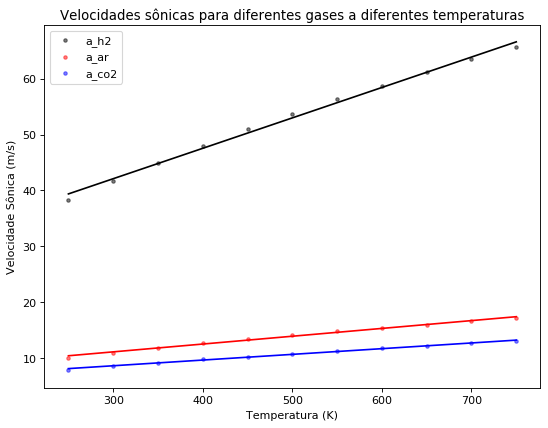

In [99]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['T (K)'], plotable['a_h2'], s=np.pi*3, c='k', alpha=0.5, label = 'a_h2')
plt.plot(df['T (K)'], h2_pred, c='k')
plt.scatter(df['T (K)'], plotable['a_ar'], s=np.pi*3, c='r', alpha=0.5, label = 'a_ar')
plt.plot(df['T (K)'], ar_pred, c='r')
plt.scatter(df['T (K)'], plotable['a_co2'], s=np.pi*3, c='b', alpha=0.5, label = 'a_co2')
plt.plot(df['T (K)'], co2_pred, c='b')
plt.title('Velocidades sônicas para diferentes gases a diferentes temperaturas')
plt.xlabel('Temperatura (K)')
plt.ylabel('Velocidade Sônica (m/s)')
plt.legend()
plt.savefig('velocidades.png')
plt.show()

In [8]:
1e5/(1.292 * 0.2598 * 300)

993.063649024295

In [4]:
1.042*(1300) - 0.2968*126.2*(0.02 - 0.045)

1355.5364040000002

In [1]:
0.9216*1300

1198.08

In [2]:
1300 * 0.662

860.6